In [1091]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from datetime import datetime
from datetime import timedelta 

In [1092]:
# url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
country="Canada"
state="Ontario"

In [1093]:
raw_dataset = pd.read_csv(url)

In [1094]:
df = raw_dataset[(raw_dataset['Country/Region']==country) & (raw_dataset['Province/State']==state)]

In [1095]:
df = df.drop(columns=['Lat', 'Long'])
df1 = df.melt(['Province/State', 'Country/Region'], var_name='Date', value_name='Cases')
df1.insert(3, 'Day', range(1, 1 + len(df1)))
dataset_all = df1.drop(columns=['Province/State', 'Country/Region'])

In [1096]:
dataset = dataset_all.tail(6)

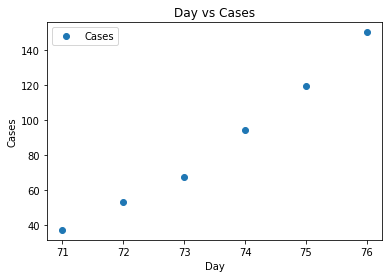

In [1097]:
dataset.plot(x='Day', y='Cases', style='o')  
plt.title('Day vs Cases')  
plt.xlabel('Day')  
plt.ylabel('Cases')  
plt.show()

In [1098]:
X = dataset['Day'].values.reshape(-1,1)
y = dataset['Cases'].values.reshape(-1,1)

In [1099]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [1100]:
for x in np.nditer(X_train):
    print(x, end=' ')

72 74 71 75 

In [1101]:
for y in np.nditer(y_train):
    print(y, end=' ')

53 94 37 119 

In [1102]:
df1[df1['Day']==28]

,Province/State,Country/Region,Date,Day,Cases
27,Ontario,Canada,2/18/20,28,0


In [1103]:
regressor = LinearRegression()
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1104]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)


[-1420.75]
[[20.5]]


In [1105]:
# np.set_printoptions(suppress=True)
# arr = np.empty((len(X_train),3))
# for i in range(1, len(X_train)):
#     y_predicted = regressor.coef_ * X_train[i, 0] + regressor.intercept_[0]
#     y_actual = y_train[i, 0]
#     arr[i,:] = [X_train[i, 0], y_predicted, y_actual]

# print(arr)


In [1106]:
y_pred = regressor.predict(X_test)

In [1107]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,150,137.25
1,67,75.75


In [1108]:
# Actual vs Predicated
# df.plot(kind='bar',figsize=(16,10))
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

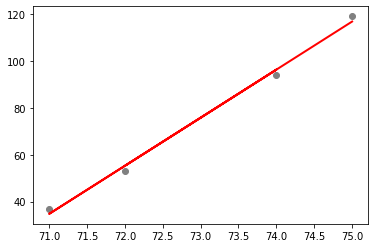

In [1109]:
# Plotting straight line with all data
y_train_pred = regressor.predict(X_train)
plt.scatter(X_train, y_train,  color='gray')
plt.plot(X_train, y_train_pred, color='red', linewidth=2)
plt.show()

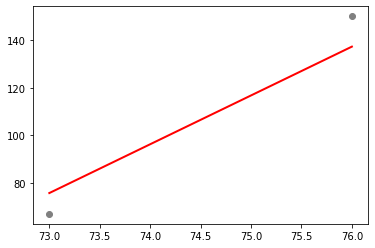

In [1110]:
# Plotting straight line with test data
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [1111]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 10.75
Mean Squared Error: 119.5625
Root Mean Squared Error: 10.93446386431452


In [1112]:
# Predictions for one day
# next_day = dataset.tail(1)['Day'].values[0] + 1
# last_date = dataset.tail(1)['Date'].values[0] 
# next_date = datetime.strftime(datetime.strptime(last_date, '%m/%d/%y') + timedelta(days=1), '%m/%d/%Y')
# next_day_prediction = regressor.predict([[next_day]])[0,0]
# data = [[country, state, next_date, int(next_day_prediction)]] 
# df = pd.DataFrame(data, columns = ['Country', 'State', 'Date', 'Confirmed_Cases_Predicated'])
# df.style.set_properties(**{'text-align': 'left'})

In [1113]:
next_days = []
next_dates = []
next_day_predictions = []

next_day = dataset.tail(1)['Day'].values[0] + 1
next_days.append(next_day)

next_date = datetime.strftime(datetime.strptime(dataset.tail(1)['Date'].values[0] , '%m/%d/%y') + timedelta(days=1), '%m/%d/%Y')
next_dates.append(next_date)

next_day_prediction = int(regressor.predict([[next_day]])[0,0])
next_day_predictions.append(next_day_prediction)

for i in range(1, 3):
    next_days.append(next_days[-1] + 1)
    next_dates.append(datetime.strftime(datetime.strptime(next_dates[-1], '%m/%d/%Y') + timedelta(days=1), '%m/%d/%Y'))
    next_day_predictions.append(int(regressor.predict([[next_days[-1]]])[0,0]))

print(next_days)
d = {'Country': country, 'State': state, 'Date': next_dates, 'Confirmed_Cases_Predications': next_day_predictions }
df = pd.DataFrame(d)
df.style.set_properties(**{'text-align': 'left'})
    

[77, 78, 79]


,Country,State,Date,Confirmed_Cases_Predications
0,Canada,Ontario,04/07/2020,157
1,Canada,Ontario,04/08/2020,178
2,Canada,Ontario,04/09/2020,198
